***Import dependencies***

In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.datasets
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn import metrics
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder

***Import the California House Price Dataset and Frame it in a Pandas DataFrame***

In [16]:
house_price_dataset = pd.read_csv('california_house.csv')

In [17]:
#Checking the number of rows and columns in the dataset
house_price_dataset.shape

(20640, 10)

***Check whether are there any missing values***

In [18]:
house_price_dataset.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
ocean_proximity         0
median_house_value      0
dtype: int64

***Statistical measures of dataset***

In [19]:
house_price_dataset.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


***Compute the scewness of data in total bedrooms column***

In [25]:
skewness = house_price_dataset['total_bedrooms'].skew()
print('skewness of total bedrooms is:', skewness)

skewness of total bedrooms is: 3.459546331523342


***Fill the null values by replacing the median***

In [30]:
imputer = SimpleImputer(strategy='median')
# Filling the missing values with the median
house_price_dataset[['total_bedrooms']] = imputer.fit_transform(house_price_dataset[['total_bedrooms']])

***Recheck the missing elements of data***

In [31]:
house_price_dataset.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
ocean_proximity       0
median_house_value    0
dtype: int64

***Encode the catogorical features***

In [44]:
encoder = OneHotEncoder(handle_unknown='ignore')
# Encoding the categorical features
encoded_data = encoder.fit_transform(house_price_dataset[['ocean_proximity']])
#Converting to a pandas DataFrame
encoded_DataFrame = pd.DataFrame(encoded_data.toarray() , columns=encoder.get_feature_names_out(['ocean_proximity']))
#Placing the encoded feature data with the original dataset
house_price_dataset = house_price_dataset.drop('ocean_proximity', axis=1)
house_price_dataset = pd.concat([house_price_dataset, encoded_DataFrame], axis=1)

***Understanding correlation between various features of data***  
1. Possitive Correlation  
2. Negative Correlation

In [45]:
correlation = house_price_dataset.corr()

***Constructing a heatmap to denote correlation between features***

<Axes: >

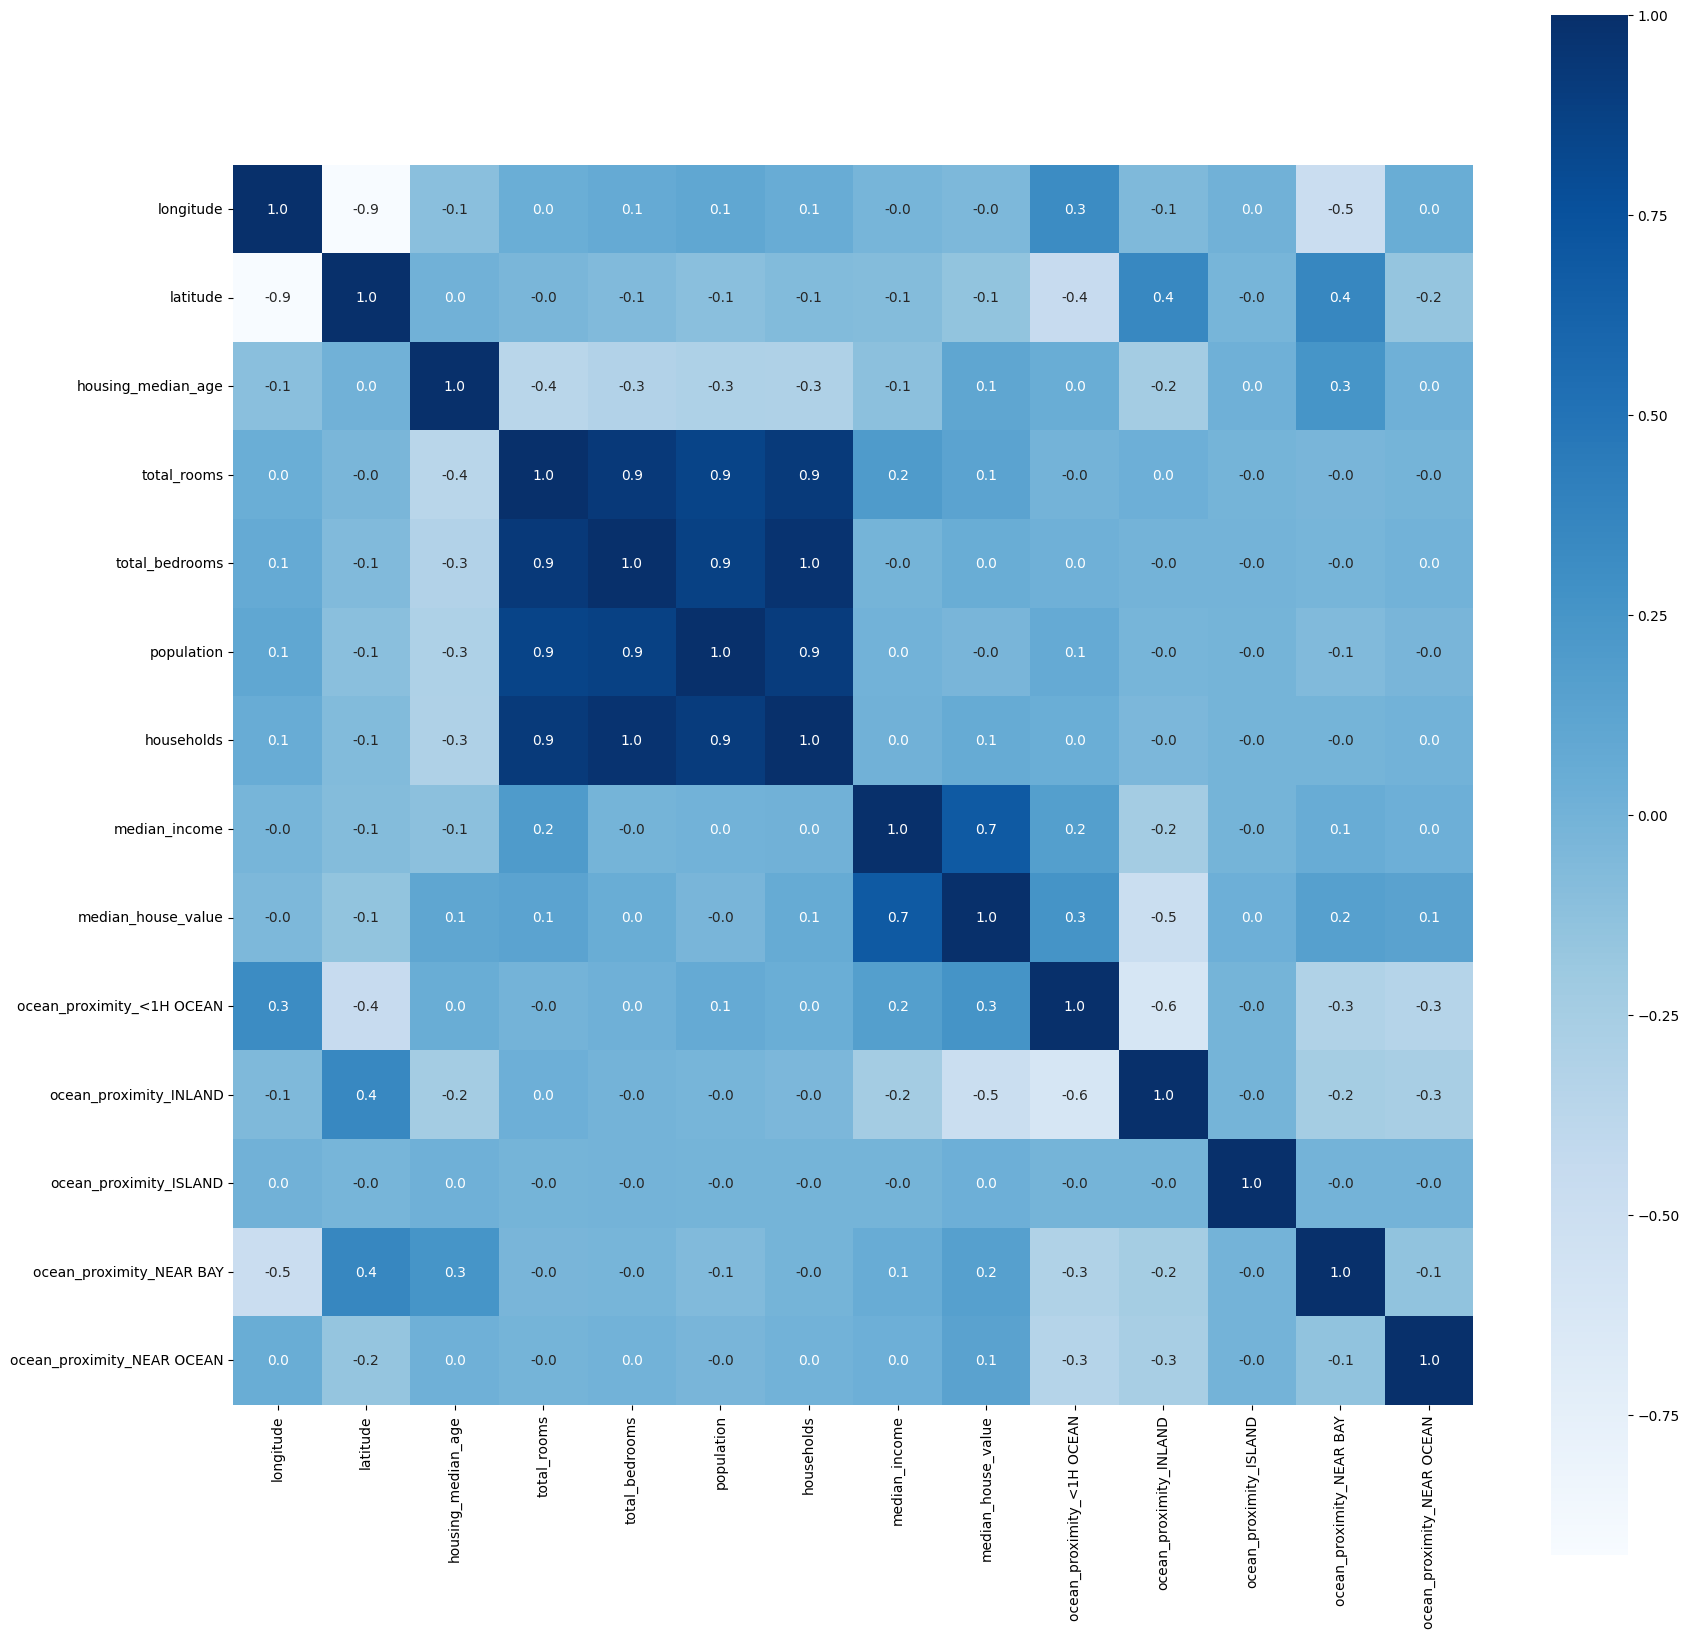

In [46]:
plt.figure(figsize=(20,20))
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f', annot=True, annot_kws={'size':10}, cmap='Blues')

***Splitting the features and the lables***

In [54]:
X = house_price_dataset.drop(['median_house_value'], axis=1)
Y = house_price_dataset['median_house_value']
X.columns = [col.replace('<', 'LT').replace('>', 'GT').replace('[', '').replace(']', '').replace(' ', '_')
                   for col in X.columns]

In [55]:
print(X)
print(Y)

       longitude  ...  ocean_proximity_NEAR_OCEAN
0        -122.23  ...                         0.0
1        -122.22  ...                         0.0
2        -122.24  ...                         0.0
3        -122.25  ...                         0.0
4        -122.25  ...                         0.0
...          ...  ...                         ...
20635    -121.09  ...                         0.0
20636    -121.21  ...                         0.0
20637    -121.22  ...                         0.0
20638    -121.32  ...                         0.0
20639    -121.24  ...                         0.0

[20640 rows x 13 columns]
0        452600
1        358500
2        352100
3        341300
4        342200
          ...  
20635     78100
20636     77100
20637     92300
20638     84700
20639     89400
Name: median_house_value, Length: 20640, dtype: int64


***Splitting the data into training data and test data***

In [56]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2, random_state=42)
print(X.shape, X_train.shape, X_test.shape)


(20640, 13) (16512, 13) (4128, 13)


***Model Training***  
**XGBoost Regression Model**

In [57]:
#Loading the XGBoost Regressor model
model = XGBRegressor()

In [58]:
#Training the model with X_train and Y_train
model.fit(X_train, Y_train)

,objective,'reg:squarederror'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,None
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,None


***Evaluation***

*Here we can not measure accuracy score since this is a regression problem*

In [60]:
#Prediction of training data
train_data_prediction = model.predict(X_train)
print(train_data_prediction)

[118275.51 337726.38 168686.8  ... 237484.92 262769.8  334697.72]


In [62]:
# R Squared Error
score_1 = metrics.r2_score(Y_train, train_data_prediction)

#Mean Absolute Error
score_2 = metrics.mean_absolute_error(Y_train, train_data_prediction)

print('R Squared Error:', score_1)
print('Mean Absolute Error:', score_2)

R Squared Error: 0.9388081431388855
Mean Absolute Error: 20171.9921875


***Visualize ancual values vs redicted values***

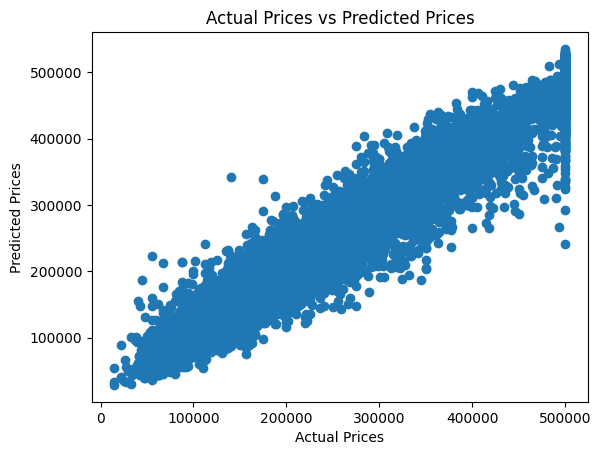

In [68]:
plt.scatter(Y_train, train_data_prediction)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual Prices vs Predicted Prices')
plt.show()

In [63]:
#Prediction on test data 
test_data_prediction = model.predict(X_test)

In [64]:
#R Squared Error for test data
test_score_1 = metrics.r2_score(Y_test, test_data_prediction)
#Mean Absolute Error for test data
test_score_2 = metrics.mean_absolute_error(Y_test, test_data_prediction)

print('Test R Squared Error:', test_score_1)
print('Test Mean Absolute Error:', test_score_2)

Test R Squared Error: 0.8270021080970764
Test Mean Absolute Error: 31606.03515625
